In [1]:
import numpy as np
from copy import copy
import networkx as nx
import matplotlib.pyplot as plt
from vbi.models.cpp.jansen_rit import JR_sdde_cpp
from helpers import *

In [2]:
seed = 10
np.random.seed(seed)
plt.rcParams["axes.labelsize"] = 13

In [3]:
N = 4
adj = nx.to_numpy_array(nx.complete_graph(N), dtype=float)
delays = copy(adj * 0.2)

In [4]:
param = {
    "dt": 0.1,                     # time step
    "G": 0.1,                       # coupling strength
    "mu": 0.22,                     # mean of the input
    "sigma": 0.005,                 # noise amplitude
    "C0": 135.0 * 1.0,              
    "C1": 135.0 * 0.8,              
    "C2": 135.0 * 0.25,
    "C3": 135.0 * 0.25,
    "t_end": 2000.0,                # simulation time
    "t_transition":1000.0,          # transition time
    "weights": adj,                 # adjacency matrix
    "delays": delays,               # delay matrix
    "integration_method": "heun",   

    # stimulation
    "sti_ti": 1000 + 100,
    "sti_duration": 10,
    "sti_gain": 0.5,
    "sti_amplitude": 0.1* np.array([0.1, 0.0, 0.2, 0.05]), # or just 0.1  
}

In [5]:
control_dict = {
    "G": {"value": 1.0},
    "C1": {"indices": [[0], [2,3]], "value": [135.0, 155.0]}
}

In [6]:
obj = JR_sdde_cpp(param)
data = obj.run()
t = data['t']
x = data['x']
sti = data['sti']
# print(obj.C1, obj.sti_amplitude)

plot stimulation signal<br>
plt.figure(figsize=(6,2.5))<br>
plt.plot(data['t'], data['sti'])<br>
plt.xlabel('time(ms)');<br>
plt.ylabel('sti amplitude');<br>
plt.tight_layout()<br>
plt.show()

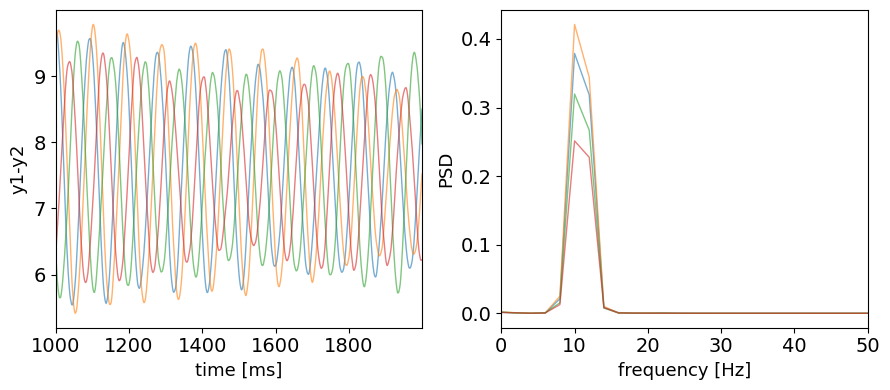

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
plot_ts_jr(data, param, [ax[0], ax[1]], alpha=0.6, lw=1)
plt.show()

In [8]:
#!TODO: add sweep over G example